In [22]:
# Clustering com kmeans
# temos de fornecer o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from scipy import stats
import math
import random

In [23]:
file_name = 'data.csv'
data = pd.read_csv(file_name)
data['Program'] = data[' Program'].map(lambda x: x.replace(" ",""))
data['CPU'] = data[' Core(s)']
data['PKG'] = data[' Package']
data['Time'] = data[' Time (ms)']
data.drop([' Program', ' GPU', ' DRAM', ' Core(s)', ' Package', ' Time (ms)',' Temperature',' Memory'],axis=1,inplace=True)
data.columns

Index(['Language', ' PowerLimit', 'Program', 'CPU', 'PKG', 'Time'], dtype='object')

Index(['Language', ' PowerLimit', 'Program', 'CPU', 'PKG', 'Time'], dtype='object')


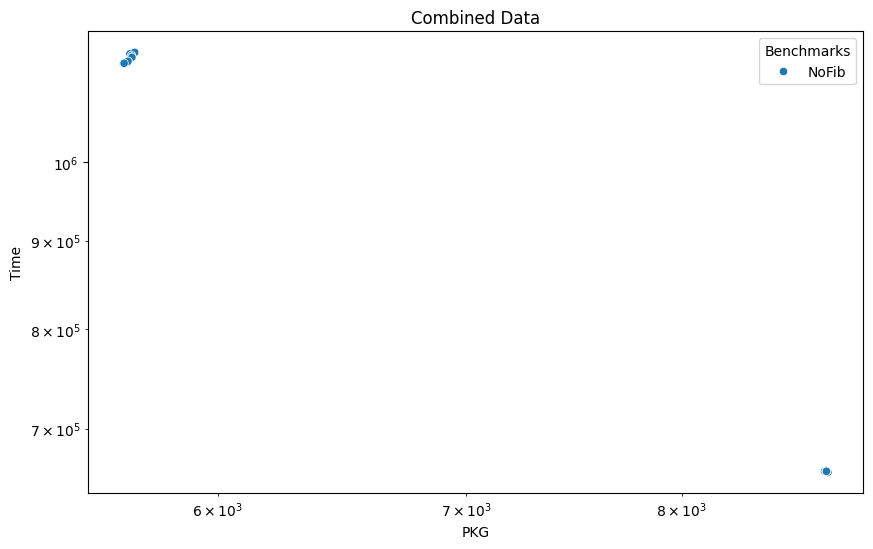

Stats for Combined Data
               Time          CPU          PKG
count  3.000000e+01    30.000000    30.000000
mean   9.832140e+05  4641.000301  6697.465027
std    2.317054e+05  1894.525772  1475.099526
min    6.603470e+05  3319.740601  5660.057983
25%    6.613848e+05  3322.718033  5663.787796
50%    1.140725e+06  3326.296600  5680.104797
75%    1.142468e+06  7272.166794  8745.937149
max    1.157450e+06  7284.493652  8757.206848

          CPU                                                                 \
        count         mean          std          min          25%        50%   
Program                                                                        
NoFib    30.0  4641.000301  1894.525772  3319.740601  3322.718033  3326.2966   

                                   Time                               \
                 75%          max count           mean           std   
Program                                                                
NoFib    7272.166794  72

In [24]:
import matplotlib.pyplot as plt
import seaborn as sea

# Plotting
print(data.columns)
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
scatter = sea.scatterplot(data=data, hue='Program', x='PKG', y='Time')
plt.legend(title='Benchmarks')  # Change legend label
plt.title("Combined Data")
plt.show()

# Summary statistics
print("Stats for Combined Data")
print(data[["Time", "CPU", "PKG"]].describe())
print()
print(data.groupby("Program")[["CPU", "Time"]].describe())


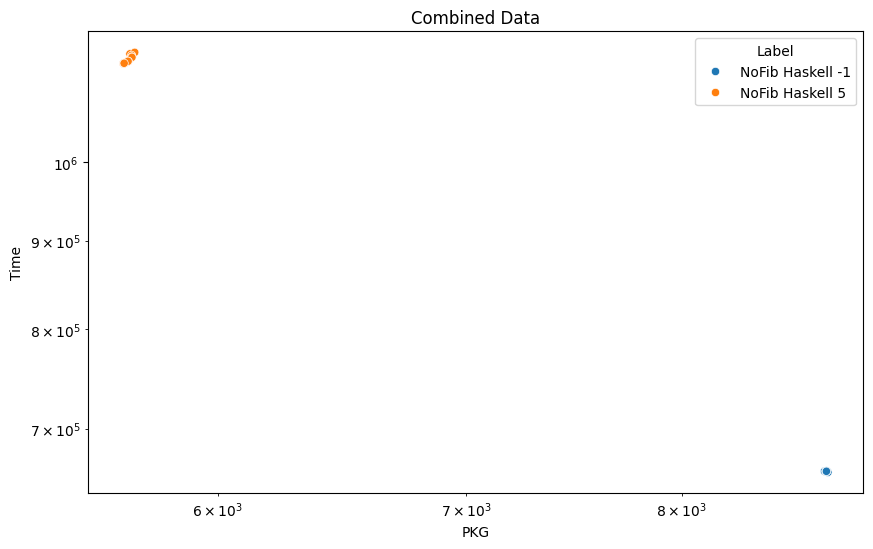

In [25]:
# Plotting
data_2 = data.copy()
data_2["Label"] = data_2["Program"]+" "+ data_2["Language"]+" "+data_2[' PowerLimit'].map(lambda x: str(x))
data_2.drop(["Program","Language"," PowerLimit"],axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
sea.scatterplot(data=data_2, hue='Label', x='PKG', y='Time')
plt.title("Combined Data")
plt.show()

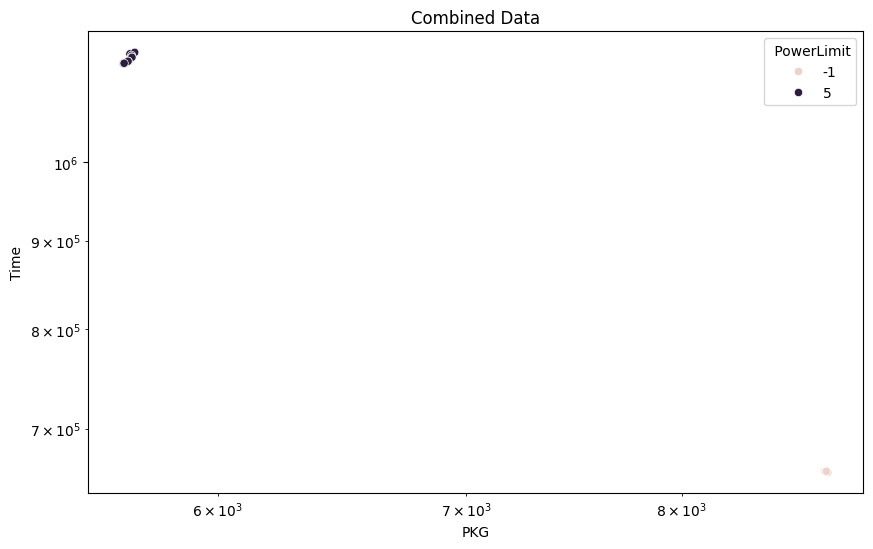

In [26]:
data_3 = data.copy()
plt.figure(figsize=(10,6))
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
sea.scatterplot(data=data_3, hue=' PowerLimit', x='PKG', y='Time')
plt.title("Combined Data")
plt.show()

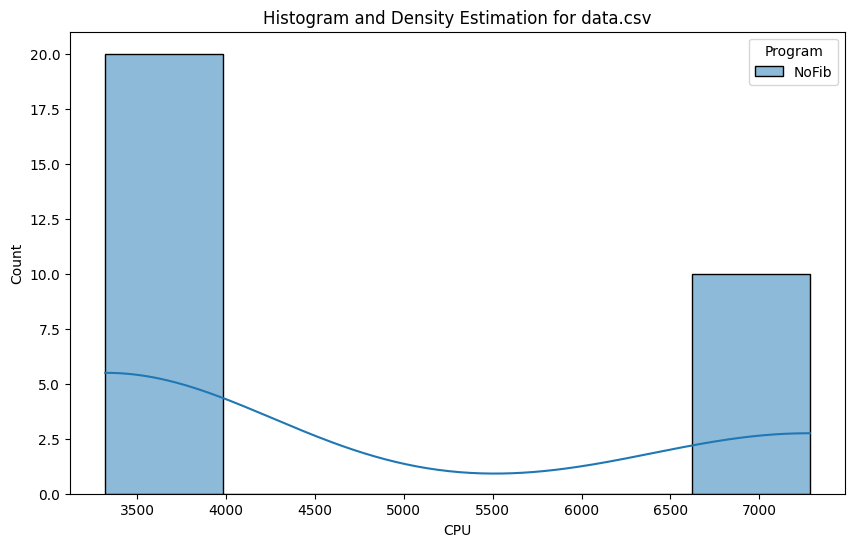

Probability density of new cases for data.csv
[0. 0. 0. 0.]




c:\Users\mikef\miniconda3\envs\CPU\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


In [28]:
plt.figure(figsize=(10,6))
sea.histplot(data=data, hue='Program', x='CPU', kde=True)  # Plot histogram with KDE
plt.title(f"Histogram and Density Estimation for {file_name}")
plt.show()

# KDE fitting
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(data[['CPU', 'Time']])

# Example of new cases
novos = np.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# Log-likelihood (probability) density of new cases
log_dens = kde.score_samples(novos)
print("Probability density of new cases for", file_name)
print(np.exp(log_dens))
print("\n")


In [30]:
combined_df = data.copy()
combined_df["Label"] = combined_df["Program"]+" "+ combined_df["Language"]
combined_df.drop(["Program","Language"],axis=1,inplace=True)

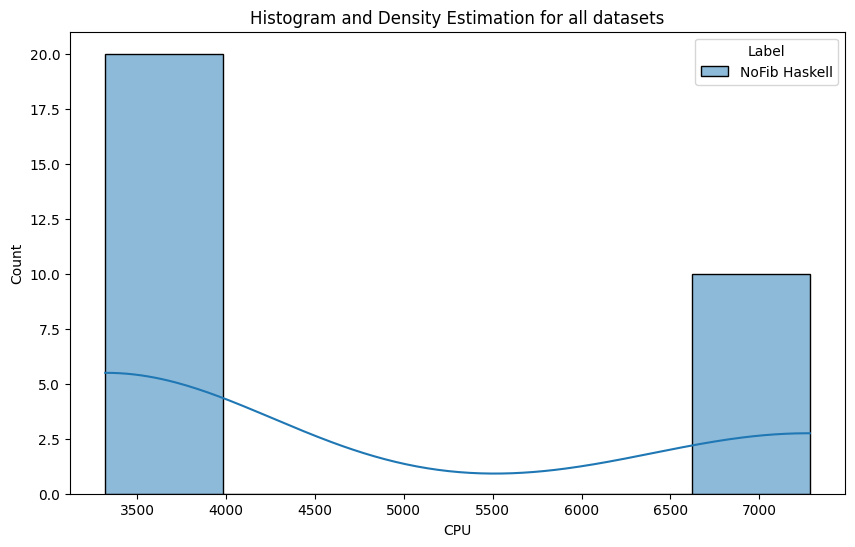

Probability density of new cases for all datasets
[0. 0. 0. 0.]




c:\Users\mikef\miniconda3\envs\CPU\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


In [31]:
# Plotting histogram and density estimation

plt.figure(figsize=(10,6))
sea.histplot(data=combined_df, hue='Label', x='CPU', kde=True)  # Plot histogram with KDE
plt.title("Histogram and Density Estimation for all datasets")
plt.show()

# KDE fitting
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(data[['CPU', 'Time']])

# Example of new cases
novos = np.array([[0.15, 3.0], [1.222, 0.3], [1.004, 0.5], [0.10, 2.51]])

# Log-likelihood (probability) density of new cases
log_dens = kde.score_samples(novos)
print("Probability density of new cases for all datasets")
print(np.exp(log_dens))
print("\n")


In [32]:
def plot_correlation_with_label(data, label_column):
    # Calculate correlation
    pearson_corr, pearson_pvalue = stats.pearsonr(data['CPU'], data['PKG'])
    spearman_corr, spearman_pvalue = stats.spearmanr(data['CPU'], data['PKG'])
    kendall_corr, kendall_pvalue = stats.kendalltau(data['CPU'], data['PKG'])

    print("Pearson Correlation coefficient:", pearson_corr, "p-value:", pearson_pvalue)
    print("Spearman Correlation coefficient:", spearman_corr, "p-value:", spearman_pvalue)
    print("Kendall Tau Correlation coefficient:", kendall_corr, "p-value:", kendall_pvalue)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.title('Correlation between CPU and PKG')

    palette = sea.color_palette("husl", len(data[label_column].unique()))

    # Scatter plot
    for label, color in zip(data[label_column].unique(), palette):
        plt.scatter(data[data[label_column] == label]['CPU'], 
                    data[data[label_column] == label]['PKG'],
                    color=color,
                    label=label)

    # Best fitting line
    plt.plot(np.unique(data.CPU), np.poly1d(np.polyfit(data.CPU, data.PKG, 1))(np.unique(data.CPU)), color='red')

    # Labelling axes
    plt.xlabel('CPU')
    plt.ylabel('PKG')

    plt.legend()

    plt.show()


Pearson Correlation coefficient: 0.9999815866514382 p-value: 1.2609983136430333e-63
Spearman Correlation coefficient: 0.892769744160178 p-value: 3.3414889757212586e-11
Kendall Tau Correlation coefficient: 0.7609195402298851 p-value: 1.5761503485829486e-11


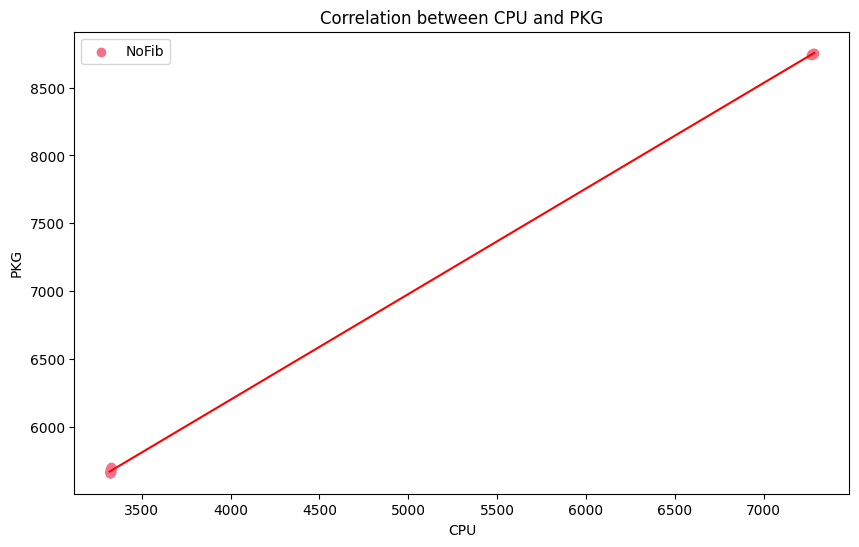

In [33]:
plot_correlation_with_label(data, 'Program')

Pearson Correlation coefficient: 0.9999815866514382 p-value: 1.2609983136430333e-63
Spearman Correlation coefficient: 0.892769744160178 p-value: 3.3414889757212586e-11
Kendall Tau Correlation coefficient: 0.7609195402298851 p-value: 1.5761503485829486e-11


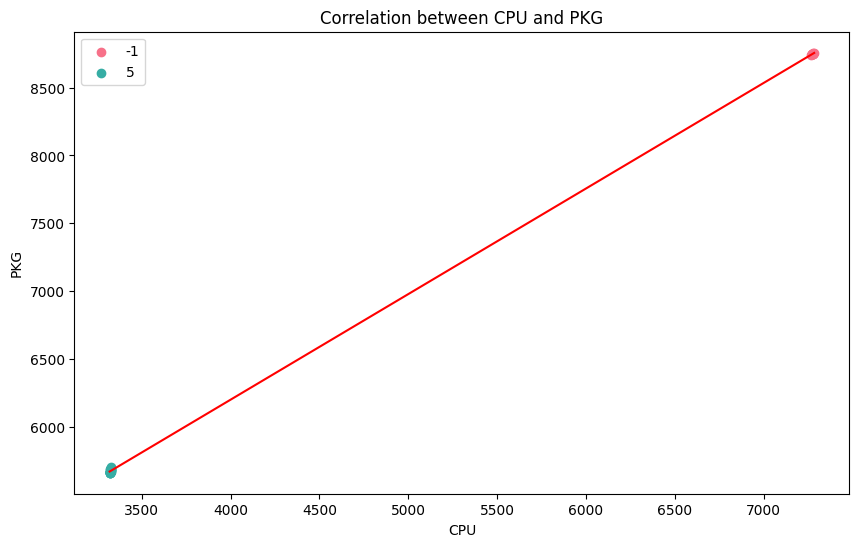

In [35]:

plot_correlation_with_label(data, ' PowerLimit')

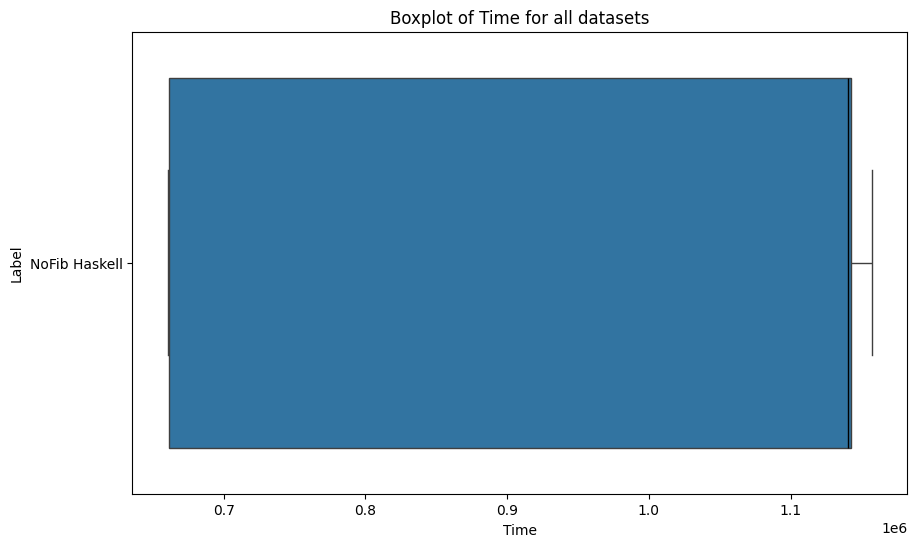

In [36]:
# Plotting boxplot
plt.figure(figsize=(10,6))
sea.boxplot(data=combined_df, hue='Label', x='Time', y='Label', medianprops={"color":"black"}, flierprops={"marker": "."})
plt.title('Boxplot of Time for all datasets')

# Labelling axes
plt.xlabel('Time')
plt.ylabel('Label')

plt.show()


Outliers e afins

number of outliers: 0 of 30 observations.
30


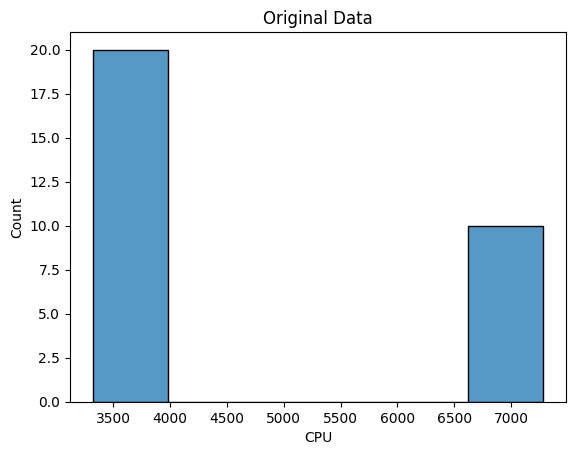

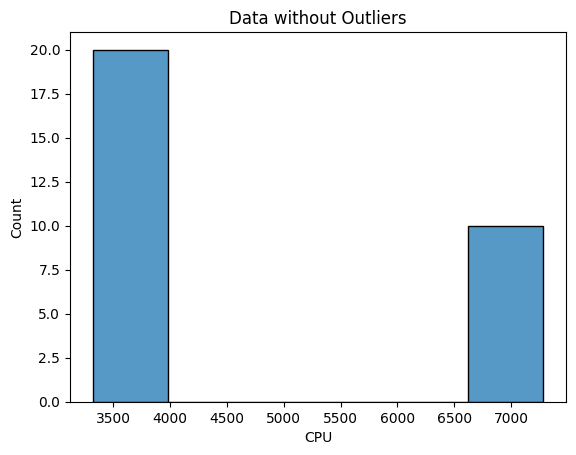

In [39]:
# remoção de outliers via as ideias incluidas nos boxplot
# IQR - Inter Quartil Range como expresso os gráficos acima

# Como a distribuição é desconhecida vamos usar o IQR.
# Com Gaussianas podiamos usar outras estrategias. Mas há vários métodos...
import seaborn as sns

def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data


# create a subset of your data
# define the data source and how to separate the data
data = combined_df.copy()
data_column = 'CPU'           # Atrib to compare
types_column_name = 'Label'    # The column name with the data in it
typeA = 'NoFib Haskell'      # The category of data A


# create a new dataframe with the interesting subset 
df_sampleA = data[(data[types_column_name]==typeA)][data_column]


# create a new dataframe with the interesting subset 
sampleA = list(df_sampleA)


df_sampleA = remove_outliers_quantile(df_sampleA)


print(df_sampleA.count())
# plot 
sns.histplot(data=data[(data[types_column_name]==typeA)][data_column]).set(title='Original Data')
plt.show()
sns.histplot(data=df_sampleA).set(title='Data without Outliers')
plt.show()

Normality Check... Anderson-Darling e outros teste para verificar se amostra segue uma Gaussiana.

In [41]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = sampleA
# normality test
result = anderson(data)
#    H0: the sample has a Gaussian distribution.
#    H1: the sample does not have a Gaussian distribution.

# imprime valor da estatística do test
# e depois a sequencia de valores criticos e alfas possíveis (significante values) 
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 6.008
15.000: 0.521, data does not look normal (reject H0)
10.000: 0.593, data does not look normal (reject H0)
5.000: 0.712, data does not look normal (reject H0)
2.500: 0.830, data does not look normal (reject H0)
1.000: 0.988, data does not look normal (reject H0)


c:\Users\mikef\miniconda3\envs\CPU\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'RPG')

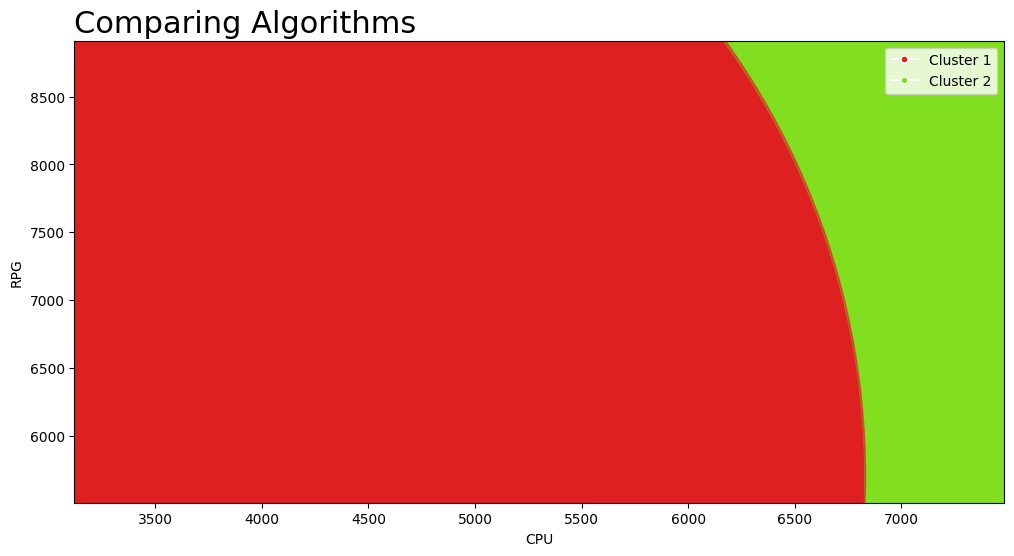

In [ ]:
# Clustering com kmeans
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

df=combined_df.copy()
# preprocessa categoricos com one hot encoding
df = pd.get_dummies(df, columns=["Label"])  

#k means
kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto")
#get centroids
df['cluster'] = kmeans.fit_predict(df)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
#define and map colors
colors = ['#DF2020', '#81DF20']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1]})

plt.figure(figsize=(12,6))
plt.scatter(df.CPU, df.PKG, c=df.c, s=df.Time, alpha = 0.6)

# create a list of legend elem
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) 
for i, mcolor in enumerate(colors)]

# plot legend
plt.legend(handles=legend_elements, loc='upper right')

# title and labels
plt.title('Comparing Algorithms', loc='left', fontsize=22)
plt.xlabel('CPU')
plt.ylabel('RPG')
